In [1]:
import pandas as pd
from plotnine import *

In [2]:
# Load the outputs from the training process
training_metrics = pd.read_csv("lightning_logs/version_0/metrics.csv")
df

,epoch,step,train_explained_var_uniform_epoch,train_explained_var_uniform_step,train_explained_var_weighted_epoch,train_explained_var_weighted_step,train_loss_epoch,train_loss_step,train_mse_epoch,train_mse_step,val_explained_var_uniform,val_explained_var_weighted,val_loss,val_mse
0,0,49,NaN,0.199448,NaN,-5.393375e-04,NaN,0.105658,NaN,0.210838,NaN,NaN,NaN,NaN
1,0,99,NaN,0.007149,NaN,1.263239e-02,NaN,0.102506,NaN,0.204325,NaN,NaN,NaN,NaN
2,0,149,NaN,0.012581,NaN,1.783666e-02,NaN,0.101604,NaN,0.203503,NaN,NaN,NaN,NaN
3,0,199,NaN,0.004355,NaN,2.475490e-02,NaN,0.102105,NaN,0.204227,NaN,NaN,NaN,NaN
4,0,249,NaN,0.008078,NaN,6.396199e-02,NaN,0.098999,NaN,0.197649,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,36,11099,NaN,0.221000,NaN,1.224603e-08,NaN,0.109591,NaN,0.218615,NaN,NaN,NaN,NaN
294,36,11149,NaN,0.213000,NaN,-2.599732e-08,NaN,0.109814,NaN,0.219474,NaN,NaN,NaN,NaN
295,36,11199,NaN,0.207000,NaN,2.073843e-09,NaN,0.108548,NaN,0.217815,NaN,NaN,NaN,NaN
296,36,11249,NaN,0.198000,NaN,8.986942e-09,NaN,0.109142,NaN,0.217955,NaN,NaN,NaN,NaN


c:\Users\1jako\anaconda3\envs\transcriptomics\lib\site-packages\plotnine\utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
c:\Users\1jako\anaconda3\envs\transcriptomics\lib\site-packages\plotnine\geoms\geom.py:289: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


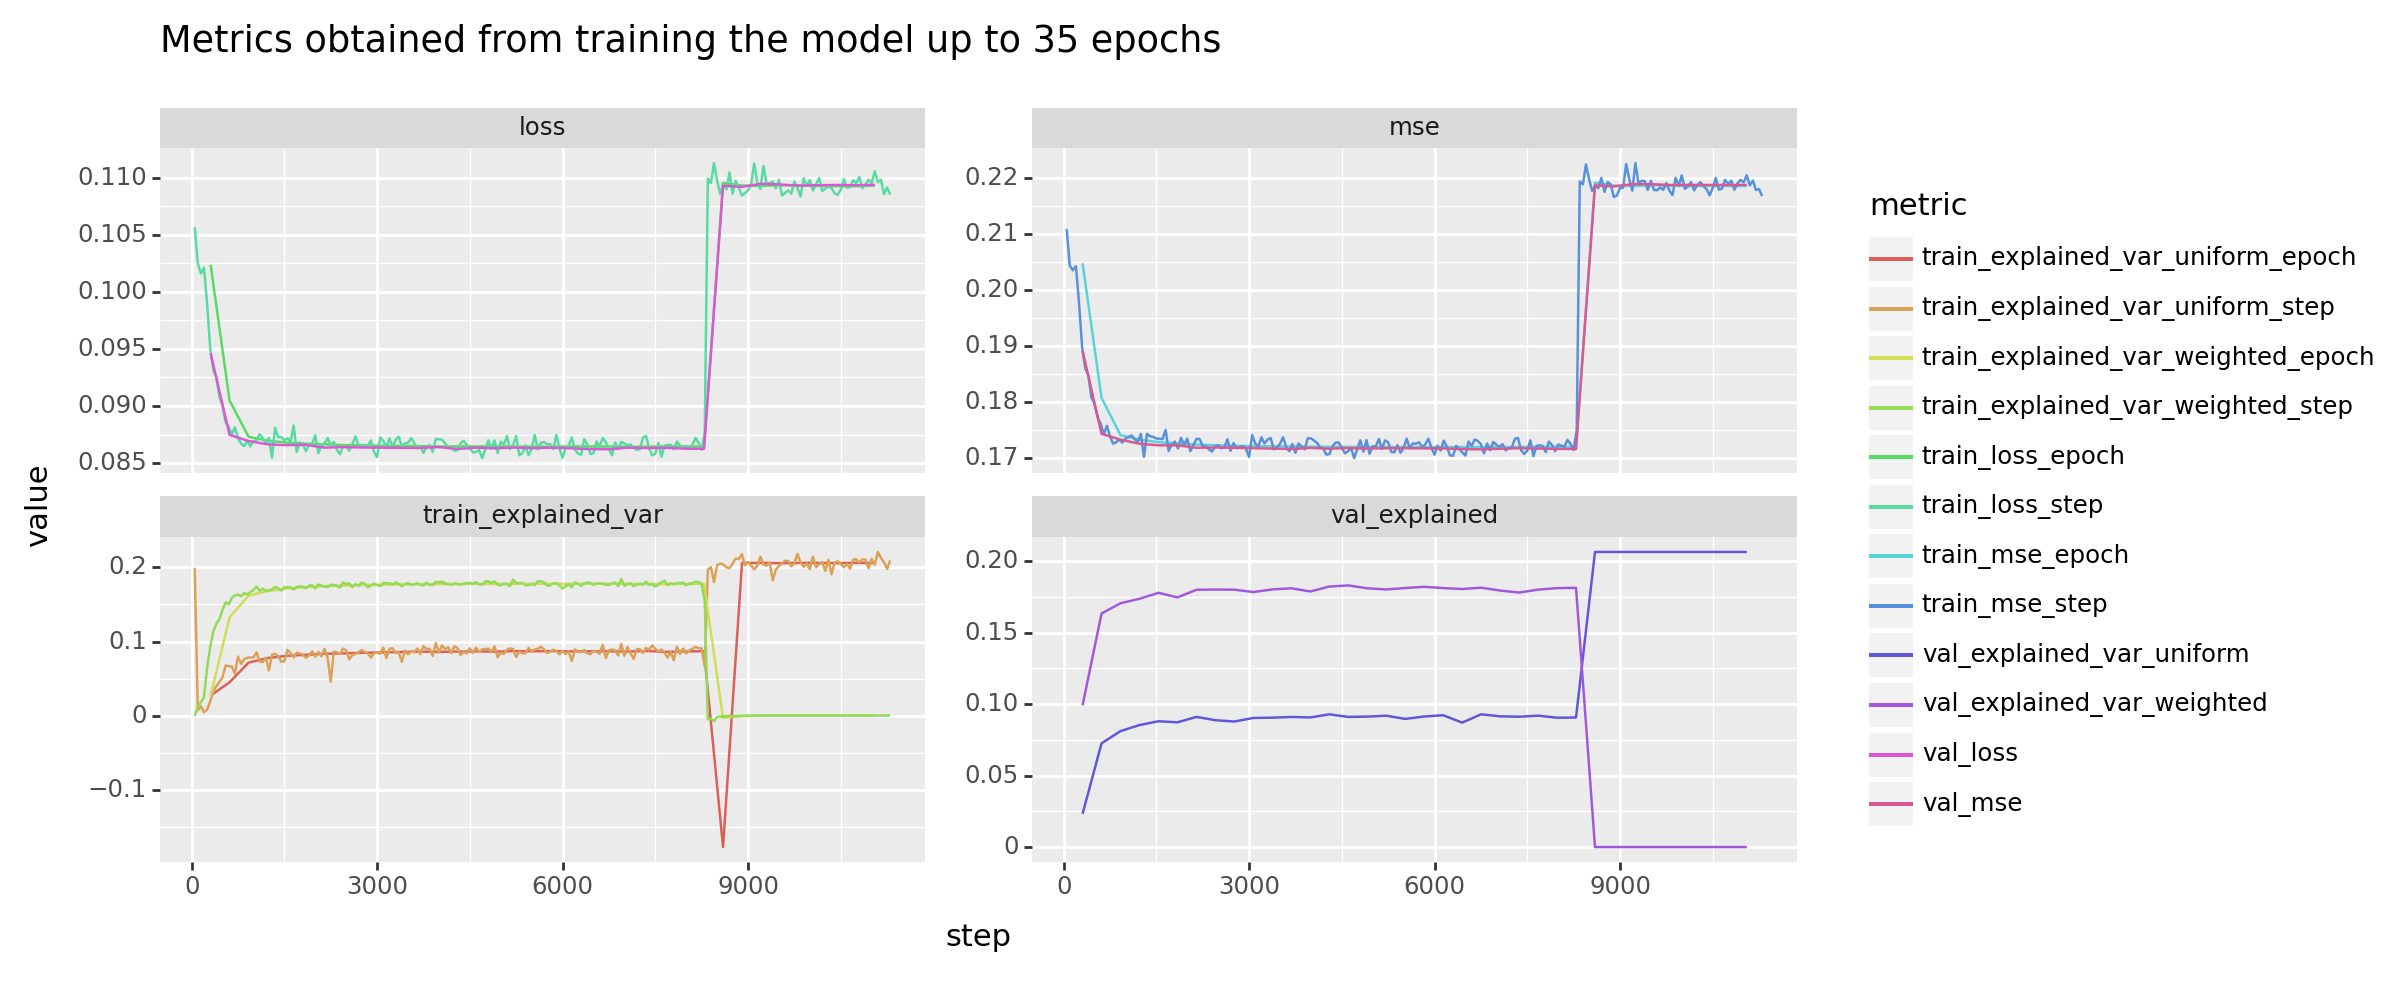

In [9]:
def plot_metrics(df, title):
    all_dfs = []
    for col in df.columns[2:]:
        df_col = df.loc[:, ["step", col]]
        df_col = df_col.dropna(axis=0).assign(metric = col).rename(columns={col: "value"})
        if col.startswith("train_explained"):
            df_col = df_col.assign(facet="train_explained_var")
        elif "loss" in col:
            df_col = df_col.assign(facet="loss")
        elif "mse" in col:
            df_col = df_col.assign(facet="mse")
        elif col.startswith("val_explained"):
            df_col = df_col.assign(facet="val_explained")

        all_dfs.append(df_col)
    df_plot = pd.concat(all_dfs, axis=0).reset_index(drop=True)
    df_plot

    plot = (
    ggplot(df_plot, aes(x="step", y="value", color="metric"))
    + geom_line()
    + facet_wrap("~ facet", scales="free_y")
    + ggtitle(title)
    + theme(figure_size=(12,5))
    )
    print(plot)
plot_metrics(training_metrics, title="Metrics obtained from training the model up to 35 epochs")

c:\Users\1jako\anaconda3\envs\transcriptomics\lib\site-packages\plotnine\utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
c:\Users\1jako\anaconda3\envs\transcriptomics\lib\site-packages\plotnine\geoms\geom.py:289: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


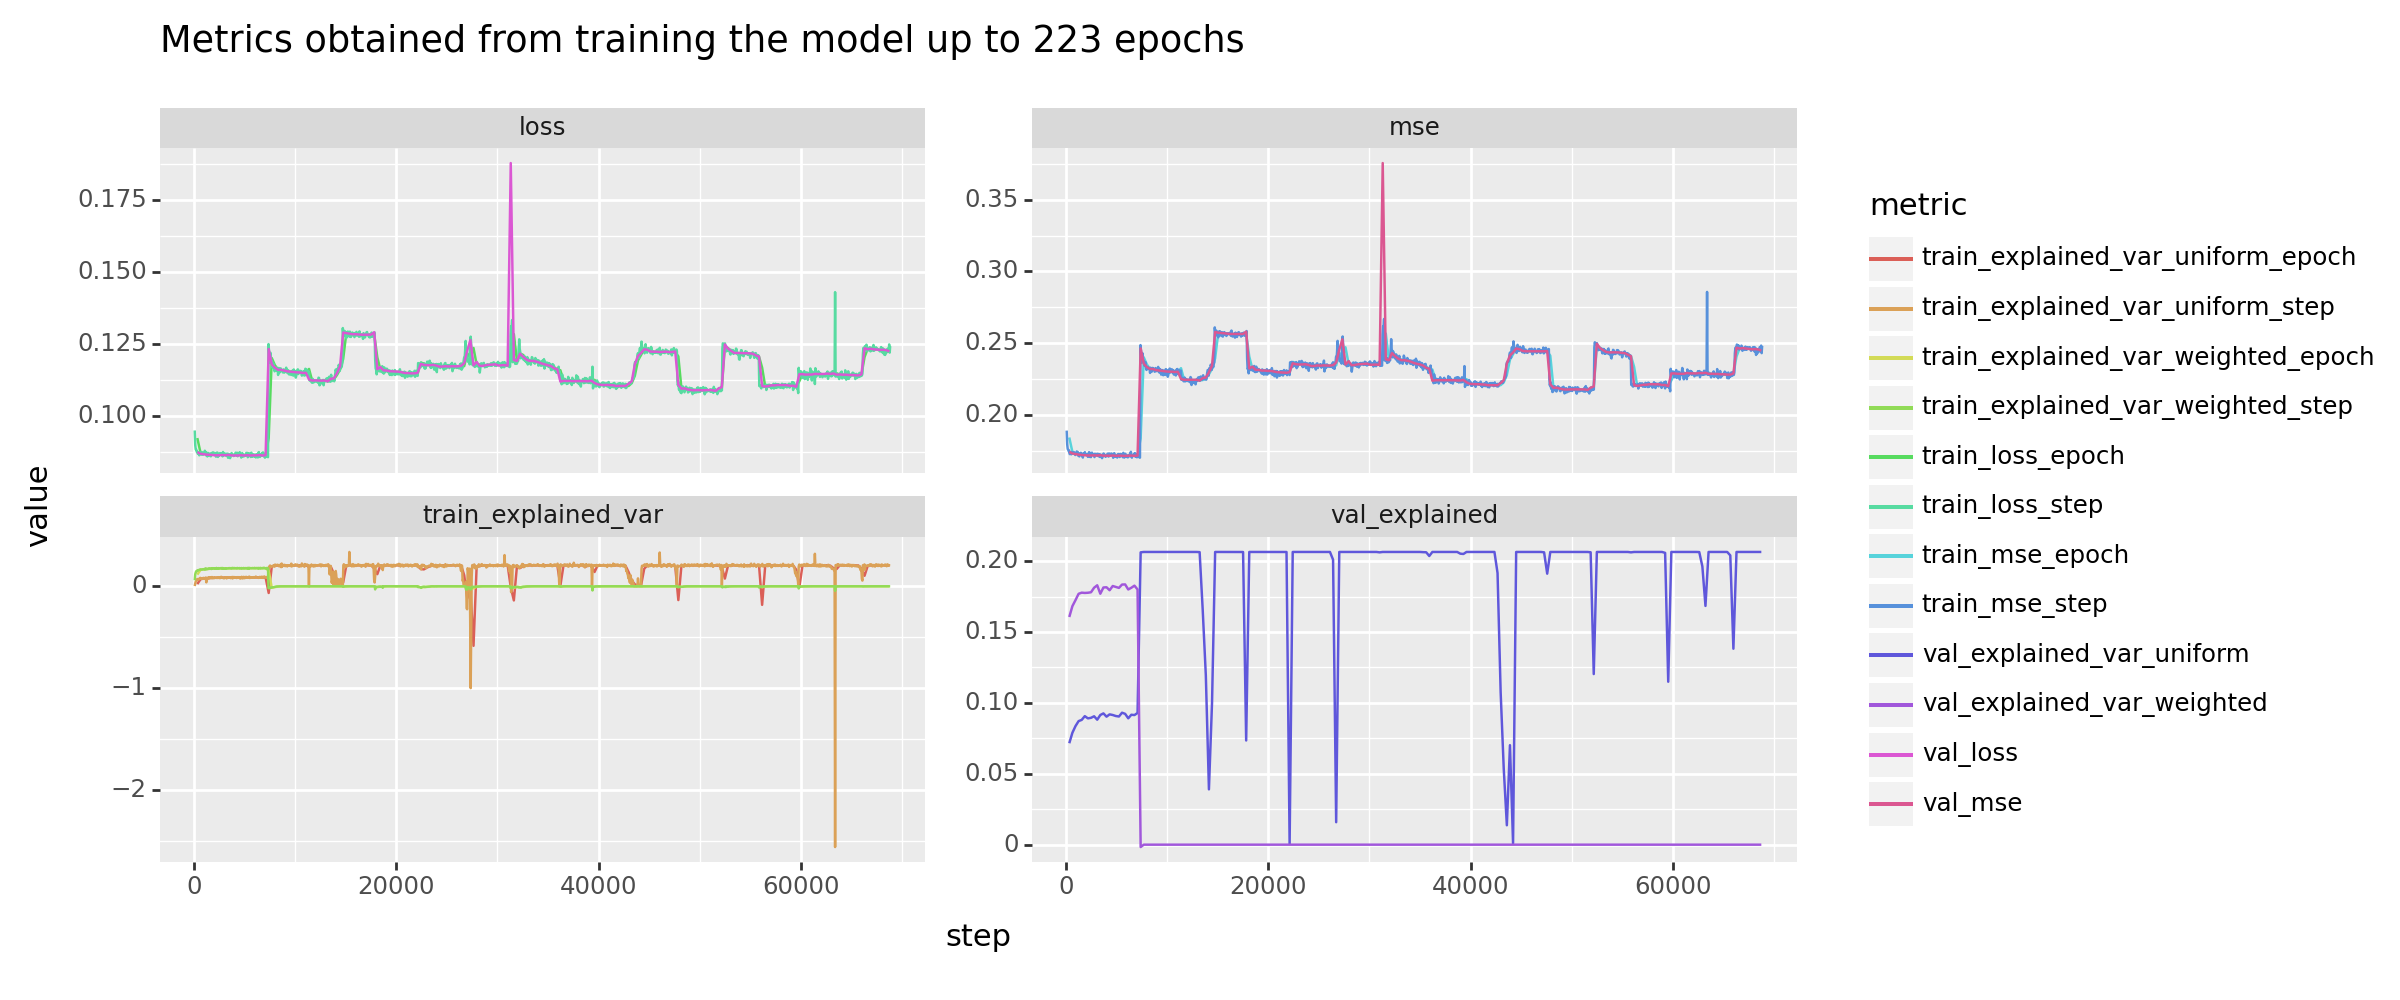

In [10]:
metrics_223 = pd.read_csv("lightning_logs/version_1/metrics.csv")
plot_metrics(metrics_223, title="Metrics obtained from training the model up to 223 epochs")

In [11]:
# Look at metrics change when using masking_rate = 0.2
metrics_low_mr = pd.read_csv("lightning_logs/version_2/metrics.csv")
metrics_low_mr

,epoch,step,train_explained_var_uniform_epoch,train_explained_var_uniform_step,train_explained_var_weighted_epoch,train_explained_var_weighted_step,train_loss_epoch,train_loss_step,train_mse_epoch,train_mse_step,val_explained_var_uniform,val_explained_var_weighted,val_loss,val_mse
0,0,49,NaN,0.208667,NaN,-8.050947e-09,NaN,0.042737,NaN,0.211999,NaN,NaN,NaN,NaN
1,0,99,NaN,0.193667,NaN,9.793673e-09,NaN,0.041948,NaN,0.210589,NaN,NaN,NaN,NaN
2,0,149,NaN,0.207666,NaN,-2.480052e-06,NaN,0.042148,NaN,0.210863,NaN,NaN,NaN,NaN
3,0,199,NaN,0.193667,NaN,-2.544297e-08,NaN,0.042367,NaN,0.210568,NaN,NaN,NaN,NaN
4,0,249,NaN,0.191667,NaN,-8.523166e-09,NaN,0.042344,NaN,0.210307,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,264,81299,NaN,0.219335,NaN,4.441885e-06,NaN,0.044007,NaN,0.218256,NaN,NaN,NaN,NaN
2154,264,81349,NaN,0.205328,NaN,-7.573742e-06,NaN,0.043364,NaN,0.218776,NaN,NaN,NaN,NaN
2155,264,81354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206442,-5.187244e-09,0.043748,0.21879
2156,264,81354,0.206308,NaN,-0.000003,NaN,0.043771,NaN,0.21889,NaN,NaN,NaN,NaN,NaN


In [17]:
df_low_mr = metrics_low_mr.loc[:, ["epoch", "val_loss", "val_mse"]].dropna(axis=0).drop_duplicates(subset="epoch", keep="last").assign(masking_rate="0.2").reset_index(drop=True)
df_normal_mr = metrics_223.loc[:, ["epoch", "val_loss", "val_mse"]].dropna(axis=0).drop_duplicates(subset="epoch", keep="last").assign(masking_rate="0.5").reset_index(drop=True)
df_low_mr = df_low_mr[df_low_mr.epoch <= max(df_normal_mr.epoch)]
df_low_mr, df_normal_mr

(     epoch  val_loss   val_mse masking_rate
 0        0  0.042270  0.211765          0.2
 1        1  0.042401  0.211909          0.2
 2        2  0.042422  0.212222          0.2
 3        3  0.043014  0.214749          0.2
 4        4  0.042993  0.214708          0.2
 ..     ...       ...       ...          ...
 219    219  0.044721  0.223473          0.2
 220    220  0.046877  0.234692          0.2
 221    221  0.046879  0.234484          0.2
 222    222  0.046732  0.233661          0.2
 223    223  0.046680  0.232798          0.2
 
 [224 rows x 4 columns],
      epoch  val_loss   val_mse masking_rate
 0        0  0.087433  0.174376          0.5
 1        1  0.086860  0.173243          0.5
 2        2  0.086718  0.172810          0.5
 3        3  0.086544  0.172441          0.5
 4        4  0.086504  0.172182          0.5
 ..     ...       ...       ...          ...
 219    219  0.123040  0.246107          0.5
 220    220  0.122918  0.245786          0.5
 221    221  0.122955  0.245

c:\Users\1jako\anaconda3\envs\transcriptomics\lib\site-packages\plotnine\utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
c:\Users\1jako\anaconda3\envs\transcriptomics\lib\site-packages\plotnine\geoms\geom.py:289: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


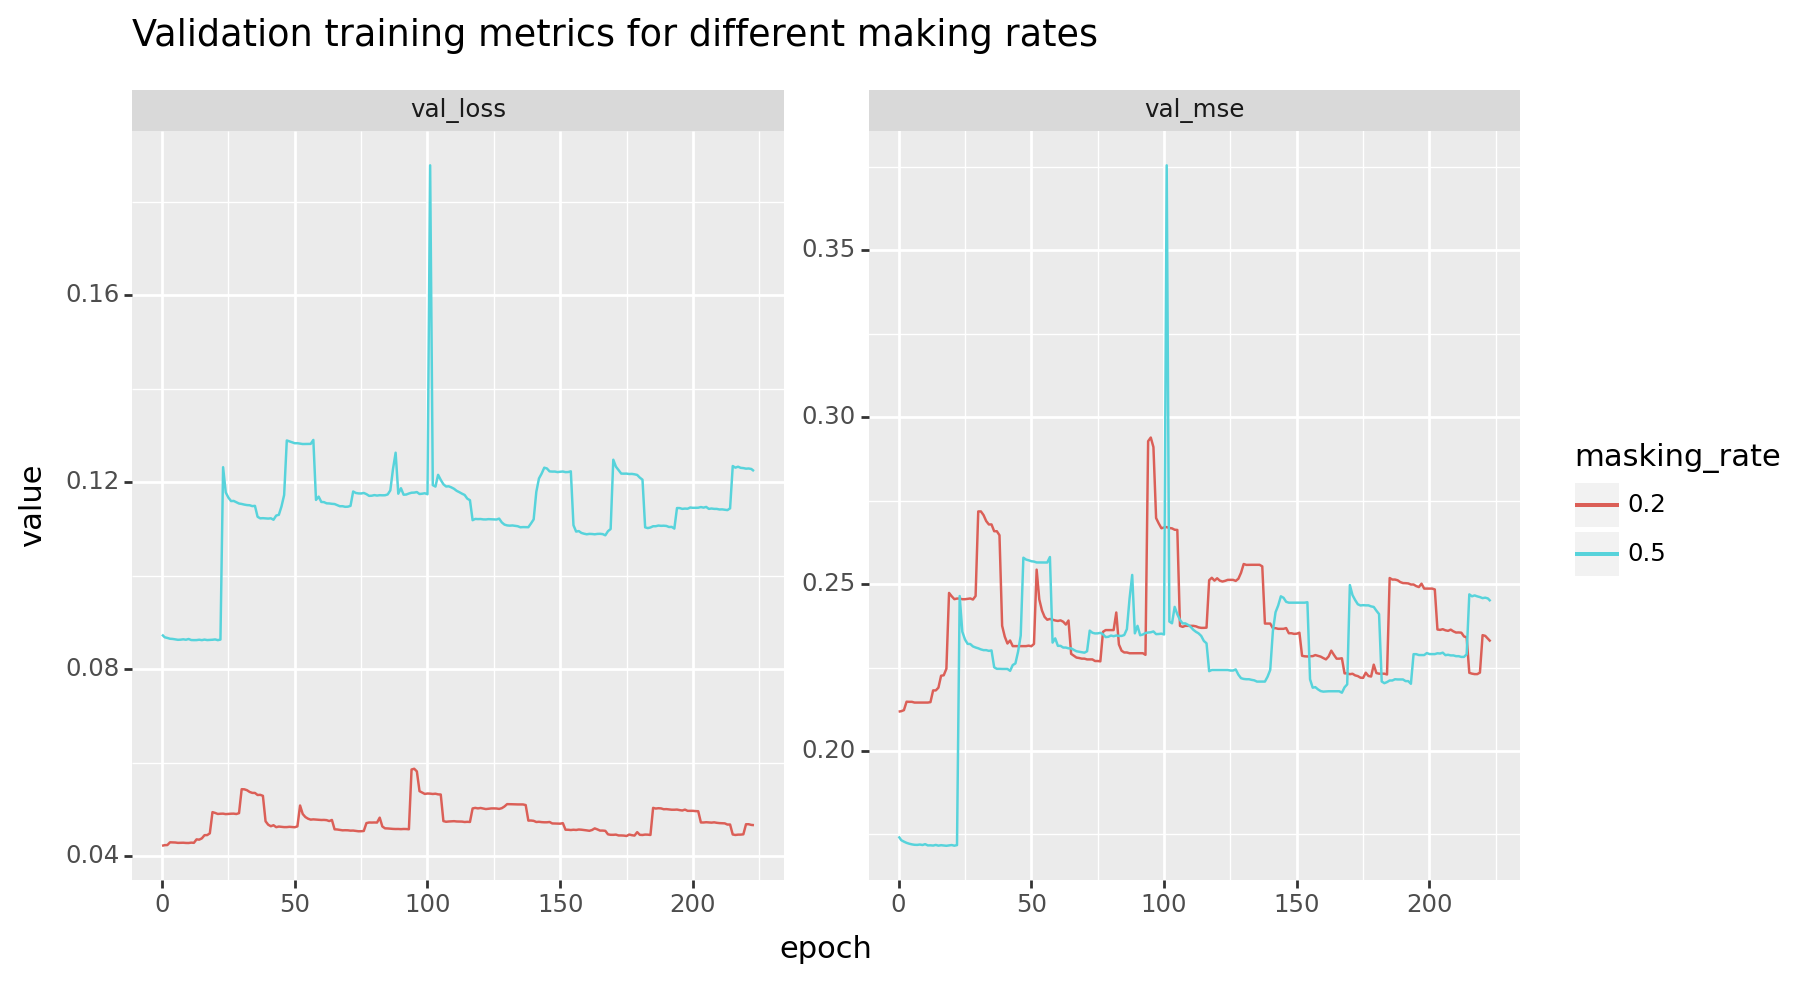

In [22]:
df_plot = pd.concat([df_low_mr, df_normal_mr], axis=0)
df_plot = df_plot.melt(id_vars=["epoch", "masking_rate"])
plot = (
    ggplot(df_plot, aes(x="epoch", y="value", color="masking_rate"))
    + geom_line()
    + facet_wrap("~variable", scales="free_y")
    + theme(figure_size=(9, 5))
    + ggtitle("Validation training metrics for different making rates")
)
print(plot)